In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
import pandas as pd 
import numpy as np 
import time                              


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import f1_score , make_scorer , roc_auc_score, average_precision_score , accuracy_score
from sklearn.model_selection import GridSearchCV

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv("Myocardial infarction complications Database.csv")

In [38]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [39]:
df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
features_Indc = np.arange(0,113)
Target_Indc = np.arange(113,124)
targets  = df.iloc[: , Target_Indc].columns.tolist()
features  = df.iloc[: , features_Indc].columns.tolist()

In [43]:
df[targets].isna().sum()

PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      0
OTEK_LANC     0
RAZRIV        0
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        0
dtype: int64

In [44]:
df[targets].nunique()

PREDS_TAH     2
JELUD_TAH     2
FIBR_JELUD    2
A_V_BLOK      2
OTEK_LANC     2
RAZRIV        2
DRESSLER      2
ZSN           2
REC_IM        2
P_IM_STEN     2
LET_IS        8
dtype: int64

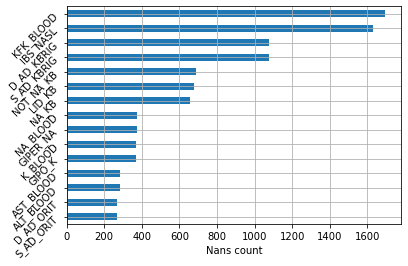

In [46]:
df[features].isna().sum(axis=0).nlargest(15).sort_values().plot(kind='barh')
plt.grid()
plt.xlabel('Nans count')
plt.yticks(rotation=45)
plt.show()

In [47]:
def ExtractNans(x):
    isnan = False
    if x > 0.3 :
        isnan = True
    return isnan
df_sorted_by_nans = df[features].isna().sum(axis=0).divide(len(df)).sort_values(ascending=False)

In [48]:
f_to_drop = df_sorted_by_nans[df_sorted_by_nans.apply(ExtractNans) == True].index.tolist()
print(f_to_drop)

['KFK_BLOOD', 'IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'NOT_NA_KB', 'LID_KB', 'NA_KB']


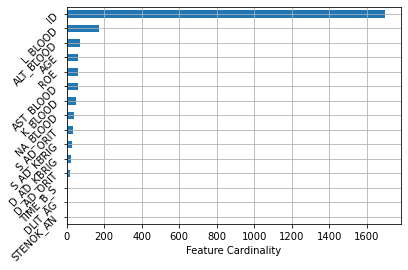

ID               1700
L_BLOOD           174
ALT_BLOOD          69
AGE                62
ROE                58
                 ... 
ritm_ecg_p_04       2
ritm_ecg_p_02       2
ritm_ecg_p_01       2
IM_PG_P             2
n_r_ecg_p_09        2
Length: 124, dtype: int64

In [49]:
df[features].nunique().nlargest(15).sort_values().plot(kind='barh')
plt.grid()
plt.xlabel('Feature Cardinality')
plt.yticks(rotation=45)
plt.show()
df.nunique().sort_values(ascending=False)

In [50]:
feature_cardinality = df[features].nunique()
Binary = feature_cardinality[feature_cardinality == 2].index.tolist()
print(f'We found {len(Binary)} Binary_features including : \n {Binary[:10]} ....' )

We found 79 Binary_features including : 
 ['SEX', 'IBS_NASL', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08'] ....


In [52]:
f_to_drop.append('ID')
print(f'The dropped columns are {f_to_drop}')
df_features = df[features].copy(deep=True).drop(columns = f_to_drop , axis = 0)

The dropped columns are ['KFK_BLOOD', 'IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'NOT_NA_KB', 'LID_KB', 'NA_KB', 'ID']


In [53]:
feature_cardinality = df_features.nunique()
Binary_features = feature_cardinality[feature_cardinality == 2].index.tolist()
len(Binary_features)

75

In [54]:
df_features[Binary_features].isna().sum().sort_values(ascending = False)*100/len(df_features)

GIPER_NA         22.058824
GIPO_K           21.705882
ritm_ecg_p_08     8.941176
ritm_ecg_p_01     8.941176
ritm_ecg_p_04     8.941176
                   ...    
zab_leg_03        0.411765
zab_leg_04        0.411765
IM_PG_P           0.058824
SEX               0.000000
FIBR_PREDS        0.000000
Length: 75, dtype: float64

In [55]:
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [57]:
for c in float_features :
    mean = df_features[c].mean()
    df_features[c] = df_features[c].fillna(value= mean)

In [58]:
(df_features.index == df['ZSN'].index).sum()

1700

In [59]:
df_case1 = pd.concat([df_features, df['ZSN'].astype('uint8')], axis=1).reindex(df_features.index)

In [60]:
y_c1 = df_case1['ZSN'].astype('uint8') 
X_C1 = df_case1.drop(columns=['ZSN'] , axis=0).copy('deep')    

In [62]:
zero = y_c1.value_counts()[0]
one = y_c1.value_counts()[1]
print (f'The target variable has {zero} : class "0" {100*zero/len(y_c1):0.2f}% \n and  {one} : class "1" {100*one/len(y_c1):0.2f}% \nthe data set is very imbalanced as expected ')

The target variable has 1306 : class "0" 76.82% 
 and  394 : class "1" 23.18% 
the data set is very imbalanced as expected 


0    1306
1     394
Name: ZSN, dtype: int64

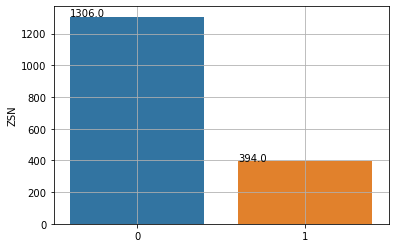

In [64]:
ax = sns.barplot(x=y_c1.value_counts().index, y=y_c1.value_counts())
plt.grid()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
y_c1.value_counts()

In [65]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_C1, y_c1, train_size = 0.9, random_state = 42, shuffle = False)

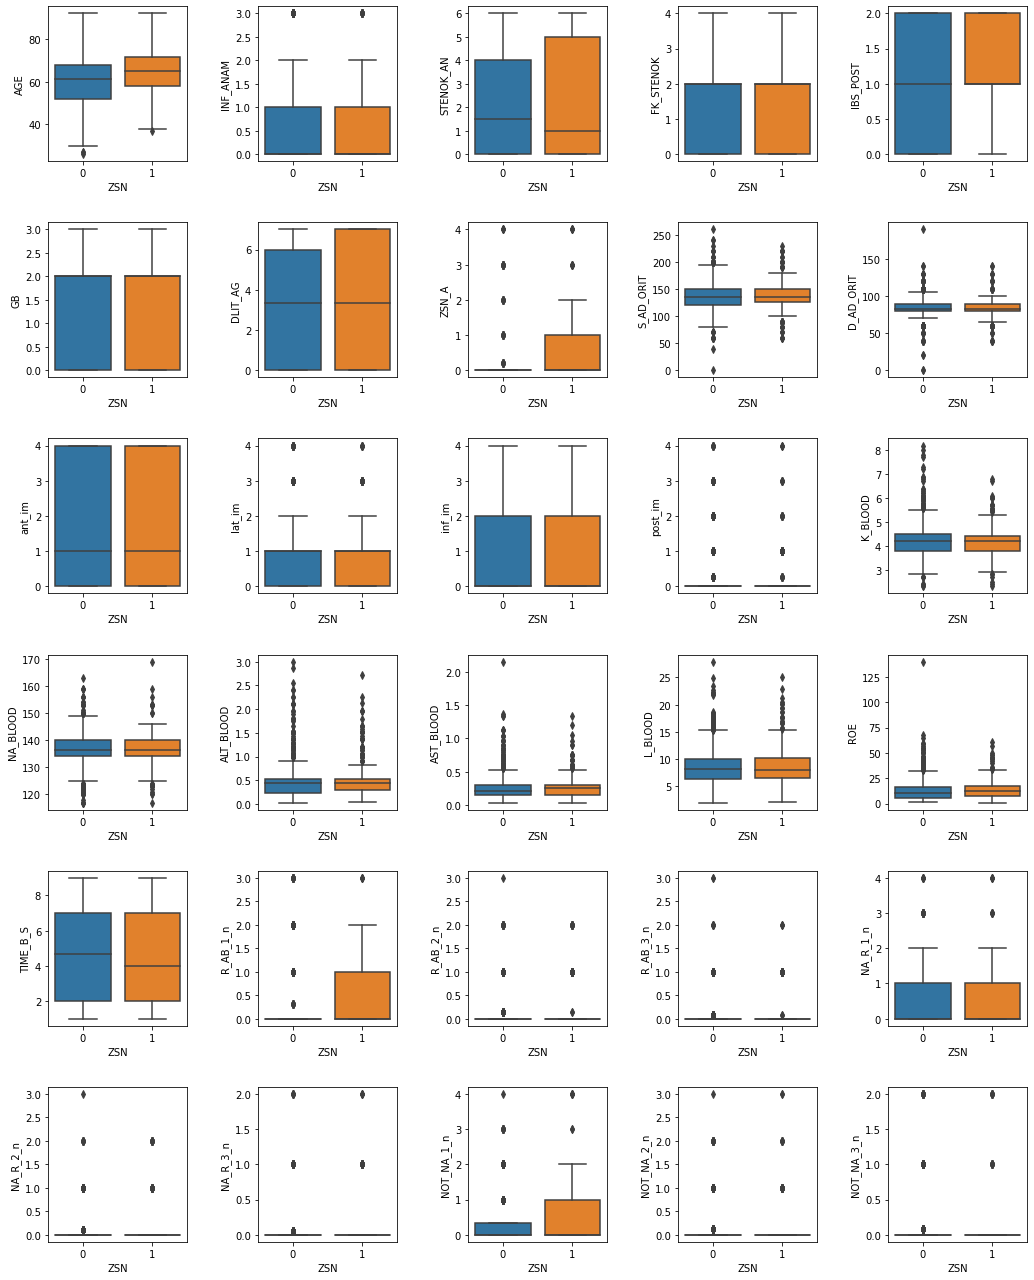

In [66]:
df_non_binary = X_train_val[float_features].copy(deep=True)
fig = plt.figure(figsize=(15,30))
for i in enumerate(float_features):
    plt.subplot(10,5,i[0]+1)
    sns.boxplot(x = y_train_val, y = i[1], data = df_non_binary)
fig.tight_layout(pad = 3.0)

In [67]:
train_outliers = X_train_val.copy(deep=True)
print(train_outliers.shape)

(1530, 105)


In [68]:
sc = StandardScaler()
scaler = sc.fit(train_outliers)
scaled = sc.transform(train_outliers)
train_outliers = pd.DataFrame(scaled , columns= train_outliers.columns , index = train_outliers.index)
train_outliers.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS
0,1.395471,0.749149,1.800214,-0.513966,-0.167671,1.067121,1.483799,-0.183928,1.299458,-0.280724,...,-0.277744,-0.229215,1.593592,-0.390221,-1.487083,0.62749,0.563375,-0.139651,-0.520333,-0.334542
1,-0.558490,0.749149,0.575707,-0.940650,-1.139941,-1.435197,-1.267736,-0.183928,-1.144053,-0.280724,...,-0.277744,-0.229215,1.593592,-0.390221,0.672457,0.62749,0.563375,-0.139651,1.921848,-0.334542
2,-0.824939,0.749149,-0.648800,-0.940650,-1.139941,1.067121,0.566620,-0.183928,-0.445907,-0.280724,...,5.045412,5.883347,1.593592,2.562648,-1.487083,0.62749,0.563375,-0.139651,-0.520333,-0.334542
3,0.596123,-1.334848,-0.648800,-0.940650,-1.139941,1.067121,0.566620,-0.183928,-0.096834,1.555439,...,-0.277744,-0.229215,-0.627513,-0.390221,0.672457,0.62749,0.563375,-0.139651,-0.520333,-0.334542
4,-0.114408,0.749149,-0.648800,-0.940650,-1.139941,1.067121,1.483799,-0.183928,1.299458,-0.280724,...,-0.277744,-0.229215,-0.627513,-0.390221,0.672457,-1.59365,0.563375,-0.139651,1.921848,-0.334542


In [69]:
X_test_scaled = sc.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled , columns= X_test.columns , index = X_test.index)
X_test_scaled_df.head(3)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS
1530,-0.380857,0.749149,-0.648800,-0.940650,-1.139941,-1.435197,-1.267736,-0.183928,-1.144053,-0.280724,...,-0.277744,-0.229215,-0.627513,-0.390221,-1.487083,0.62749,0.563375,-0.139651,-0.520333,-0.334542
1531,-0.736123,0.749149,1.800214,0.339401,1.776868,1.067121,-1.267736,5.436911,1.299458,5.227767,...,-0.277744,-0.229215,-0.627513,2.562648,0.672457,0.62749,-1.775017,-0.139651,-0.520333,-0.334542
1532,2.017186,-1.334848,-0.648800,0.047628,0.031922,0.017028,0.566620,-0.183928,1.299458,0.076245,...,-0.277744,-0.229215,-0.627513,-0.390221,0.672457,0.62749,0.563375,-0.139651,-0.520333,-0.334542


In [70]:
df_outliers = train_outliers.copy(deep=True)

In [71]:
df_outliers['ZSN'] = y_train_val

In [78]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state = 42).fit(X_train)
iso_forest_predictions = clf.predict(X_train)
outliers = 0
for val in iso_forest_predictions:
    if val == -1:
        outliers = outliers +1
print(f"Identified outliers: {outliers}.")

Identified outliers: 108.


In [79]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=2)
lof_predictions = lof.fit_predict(X_train)
print(lof.negative_outlier_factor_)
outliers = 0
for val in lof_predictions:
    if val == -1:
        outliers = outliers +1
print(f"Identified outliers: {outliers}.")

[-1.01500483 -1.0513955  -1.0194508  ... -1.17720468 -1.0893256
 -1.17494185]
Identified outliers: 41.


In [80]:
(lof_predictions == iso_forest_predictions).sum()

1085

In [81]:
from sklearn import svm
svm = svm.OneClassSVM(nu = 0.1, kernel = "rbf", gamma = 0.1)
svm.fit(X_train)
svm_predictions = svm.predict(X_train)
outliers = 0
for val in svm_predictions:
    if val == -1:
        outliers = outliers +1
print(f"Identified outliers: {outliers}.")

Identified outliers: 746.


In [82]:
X_train['ZSN'] = y_train
from scipy import stats
train_z = X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis = 1)]
print(f"X_train : {len(X_train)}. train_z : {len(train_z)}.")

X_train : 1224. train_z : 831.


In [83]:
df_forest = X_train[iso_forest_predictions==1]
inliers_in_common = 0
for val in train_z.index:
    if val in df_forest.index:
        inliers_in_common = inliers_in_common +1
inliers_in_common

828

0.26631997531199225


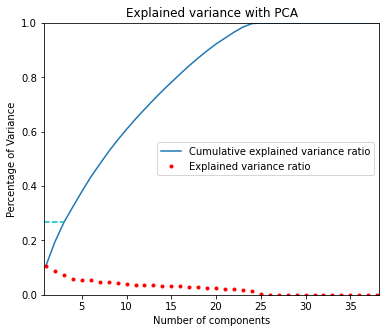

In [84]:
target = train_z['ZSN']
train_z = train_z.drop(columns = 'ZSN')

from sklearn.preprocessing import StandardScaler
features = train_z.columns
x = train_z.loc[:, features].values
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

from sklearn.decomposition import PCA
n_c = 38
pca = PCA(n_components = n_c) 
pca.fit(x)
fig, ax = plt.subplots(figsize = (6, 5))
plt.xlabel('Number of components')
plt.ylabel('Percentage of Variance')
plt.title('Explained variance with PCA')
ax.plot(np.linspace(1, n_c, n_c), np.cumsum(pca.explained_variance_ratio_))
ax.plot(np.linspace(1, n_c, n_c), pca.explained_variance_ratio_, marker = '.', linestyle = '', color = 'r')
ax.plot([0.8, 3], [np.cumsum(pca.explained_variance_ratio_)[2], np.cumsum(pca.explained_variance_ratio_)[2]], c = 'c', linestyle = '--')
print(np.cumsum(pca.explained_variance_ratio_)[2])
ax.legend(('Cumulative explained variance ratio', 'Explained variance ratio', 'Threshold (0.9)'), loc = 7)
ax.legend(('Cumulative explained variance ratio', 'Explained variance ratio'), loc = 7)
ax.set_ylim(0,1)
ax.set_xlim(0.8, n_c + 0.2)
plt.show()

In [87]:
n_components_PCA = 25
pca = PCA(n_components = n_components_PCA)
train_pca = pca.fit_transform(x)

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
train_lda = lda.fit(train_z, target).transform(train_z)

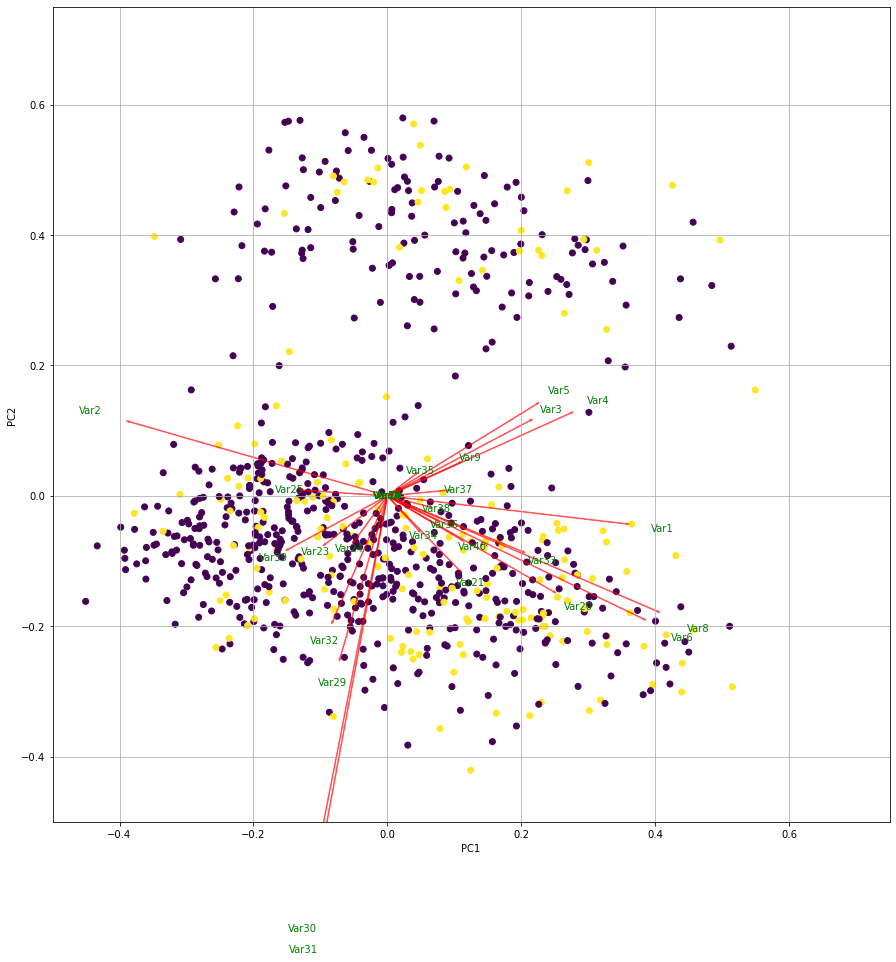

In [89]:
def biplot(score, coeff, labels = None):
    plt.figure(figsize = (15, 15))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c = target, label = target)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.5, 0.75)
    plt.ylim(-0.5, 0.75)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
biplot(train_pca[:, 0 : 2], np.transpose(pca.components_[0 : 2, :]))
plt.show()

z_train was composed of 831 rows. X_train_smote is composed of 1300 rows.


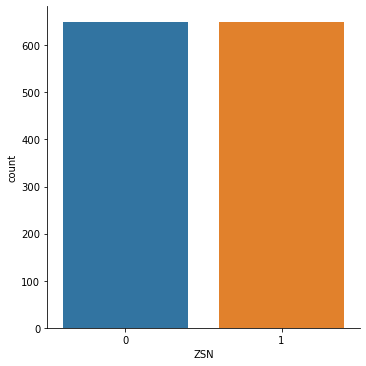

In [90]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_smote, y_train_smote = sm.fit_resample(train_z, target)
print(f"z_train was composed of {len(train_z)} rows. X_train_smote is composed of {len(X_train_smote)} rows.")
copia = X_train_smote.copy(deep = True)
copia['ZSN'] = y_train_smote
_ = sns.catplot(x = 'ZSN', kind = 'count', data = copia)

z_train was composed of 831 rows. X_train_cc is composed of 362 rows.


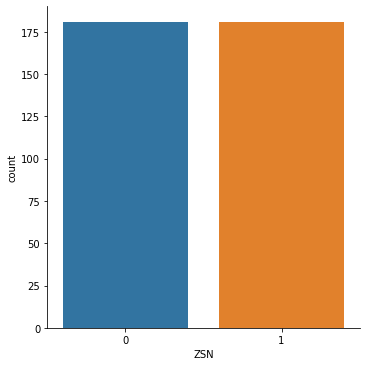

In [91]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state = 42)
X_train_cc, y_train_cc = cc.fit_resample(train_z, target)
print(f"z_train was composed of {len(train_z)} rows. X_train_cc is composed of {len(X_train_cc)} rows.")
copia = X_train_cc.copy(deep = True)
copia['ZSN'] = y_train_cc
_ = sns.catplot(x = 'ZSN', kind = 'count', data = copia)